In [1]:
import sys
sys.path.append("..")
from functions.pipeline import *

In [2]:
dataloader = get_batch("../ACDC",10,debug=True)

In [3]:
embeddings,ground_truths = next(iter(dataloader))

In [4]:
prompt_class_1 = []
prompt_class_2 = []
prompt_class_3 = []
for id,ground_truth in enumerate(ground_truths):
    print(id)
    print("class1")
    prompt_class_1.append(batch_sample_from_class(10, ground_truth, 1, n_foreground = 1, n_background= 1))
    print("class2")
    prompt_class_2.append(batch_sample_from_class(10, ground_truth, 2, n_foreground = 1, n_background= 1))
    print("class3")
    prompt_class_3.append(batch_sample_from_class(10, ground_truth, 3, n_foreground = 1, n_background= 1))

0
class1
class2
class3
1
class1
class2
class3
2
class1
class2
class3
3
class1
class2
class3
4
class1
class2
class3
5
class1
class2
class3
6
class1
class2
class3
7
class1
class2
class3
8
class1
n_foreground was reduced to 0.
class2
class3
9
class1
class2
class3


In [5]:
prompt_class_1[8]

(tensor([[[110, 112]],
 
         [[104, 101]],
 
         [[108,  97]],
 
         [[107, 100]],
 
         [[106, 102]],
 
         [[113,  98]],
 
         [[108, 114]],
 
         [[104, 108]],
 
         [[110, 109]],
 
         [[103,  99]]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [6]:
test = analyze(embeddings,ground_truths)

In [7]:
masks= test.generate_masks(prompt_class_1,prompt_class_2,prompt_class_3,10)

In [8]:
masks.shape

torch.Size([10, 10, 256, 216])

In [9]:
masks = masks.cpu()

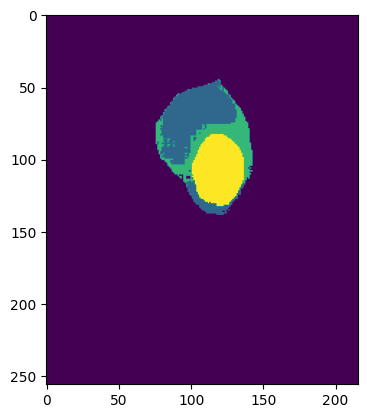

In [10]:
# Mask prediction after calculating logits
import matplotlib.pyplot as plt
plt.imshow(masks[0,2,:,:])

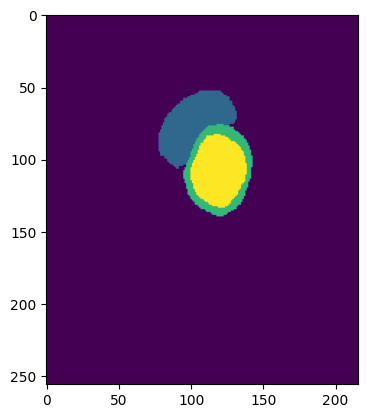

In [11]:
plt.imshow(ground_truths[0,:,:])

In [12]:
scores = []
preds = []
targets = []
masks = masks.cuda()
for f in test.metrics.values():
    print(f)
    score= test.scoring_function(f)
    scores.append(score)

<class 'torchmetrics.classification.f_beta.BinaryF1Score'>
<class 'torchmetrics.classification.jaccard.BinaryJaccardIndex'>
<class 'torchmetrics.classification.accuracy.BinaryAccuracy'>


In [17]:
scores[0][8,:,:]

tensor([[0.0000, 0.5831, 0.8097],
        [0.0000, 0.6667, 0.8157],
        [0.0000, 0.3413, 0.6910],
        [0.0000, 0.6514, 0.0000],
        [0.0000, 0.6239, 0.7568],
        [0.0000, 0.6757, 0.4698],
        [0.0000, 0.6653, 0.2764],
        [0.0000, 0.2976, 0.3292],
        [0.0000, 0.6254, 0.7879],
        [0.0000, 0.4823, 0.7298]], device='cuda:0')

In [18]:
results = test.get_results(scores[0],scores[1],scores[2],(1,1),(1,1),(1,1))

In [19]:
results

[[0,
  1,
  1,
  1,
  1,
  1,
  1,
  tensor(0.9201, device='cuda:0'),
  tensor(0.6710, device='cuda:0'),
  tensor(0.9206, device='cuda:0'),
  tensor(0.8520, device='cuda:0'),
  tensor(0.5049, device='cuda:0'),
  tensor(0.8528, device='cuda:0'),
  tensor(0.9951, device='cuda:0'),
  tensor(0.9908, device='cuda:0'),
  tensor(0.9961, device='cuda:0')],
 [0,
  1,
  1,
  1,
  1,
  1,
  1,
  tensor(0.9266, device='cuda:0'),
  tensor(0.7033, device='cuda:0'),
  tensor(0.9449, device='cuda:0'),
  tensor(0.8632, device='cuda:0'),
  tensor(0.5424, device='cuda:0'),
  tensor(0.8956, device='cuda:0'),
  tensor(0.9956, device='cuda:0'),
  tensor(0.9881, device='cuda:0'),
  tensor(0.9972, device='cuda:0')],
 [0,
  1,
  1,
  1,
  1,
  1,
  1,
  tensor(0.8183, device='cuda:0'),
  tensor(0.5078, device='cuda:0'),
  tensor(0.9651, device='cuda:0'),
  tensor(0.6925, device='cuda:0'),
  tensor(0.3403, device='cuda:0'),
  tensor(0.9326, device='cuda:0'),
  tensor(0.9886, device='cuda:0'),
  tensor(0.9840, d